# Heatmaps

#### Centered
#### Non-centered
#### Normalized Centered
#### Normalized Non-Centered
#### Normalized Centered difference
#### Normalized Non-Centered difference

In [1]:
centered = """
data {
    int<lower=0> J;          // number of schools
    vector[J] y;               // estimated treatment effect (school j)
    vector<lower=0>[J] sigma;  // std err of effect estimate (school j)
}
parameters {
    real mu;
    vector[J] theta;
    real<lower=0> tau;
}
model {
    theta ~ normal(mu, tau); 
    y ~ normal(theta,sigma);
}
"""

non_centered = """
data {
    int<lower=0> J; // number of schools 
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates 
}
parameters {
    real mu; 
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [2]:
%matplotlib inline
import pystan
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%time stan_centered = pystan.StanModel(model_code=centered)
%time stan_non_centered = pystan.StanModel(model_code=non_centered)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_276f3c57bada6b59cb395cebdded0153 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_104067597bcf75b0b9c4fcecb3418b72 NOW.


Wall time: 44 s
Wall time: 40.8 s


In [4]:
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [5]:
%time fit_centered = stan_centered.sampling(data=schools_dat)
%time fit_non_centered = stan_non_centered.sampling(data=schools_dat)

Wall time: 2.66 s
Wall time: 2.75 s


In [6]:
img_centered_df = fit_centered.to_dataframe(pars=['mu', 'tau', 'theta', 'lp__'])
img_non_centered_df = fit_non_centered.to_dataframe(pars=['mu', 'tau', 'theta', 'lp__'])

centered_divergent = img_centered_df['divergent__']
non_centered_divergent = img_non_centered_df['divergent__']

img_centered_df = img_centered_df.iloc[:, 9:]
img_non_centered_df = img_non_centered_df.iloc[:, 9:]

col_order = ['mu', 'tau'] + [col for col in img_centered_df.columns if col not in ['mu', 'tau', 'lp__']] + ['lp__']

img_centered_df = img_centered_df[col_order]
img_non_centered_df = img_non_centered_df[col_order]

In [7]:
par_len = len(col_order)
pars = col_order
print(par_len)
print(pars)

11
['mu', 'tau', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]', 'theta[5]', 'theta[6]', 'theta[7]', 'theta[8]', 'lp__']


In [8]:
img_centered_df_normalized = (img_centered_df - img_centered_df.mean()) / img_centered_df.std()
img_non_centered_df_normalized = (img_non_centered_df - img_non_centered_df.mean()) / img_non_centered_df.std()

In [9]:
img_centered_df_normalized_diff = ((img_centered_df - img_centered_df.mean()) / img_centered_df.std()).diff(1)
img_non_centered_df_normalized_diff = ((img_non_centered_df - img_non_centered_df.mean()) / img_non_centered_df.std()).diff(1)

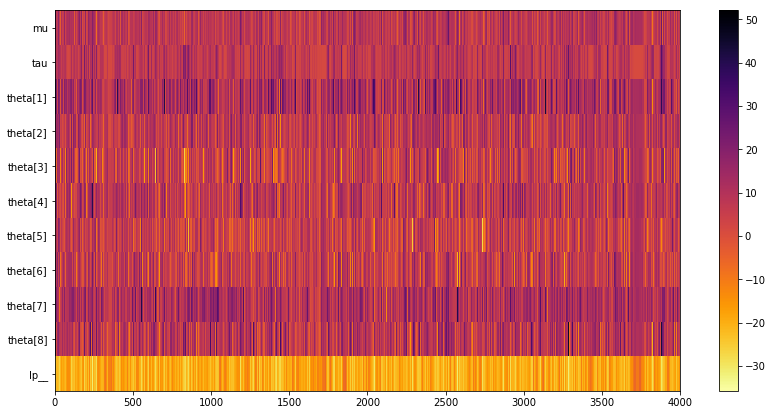

In [10]:
plt.figure(figsize=(14,7))
plt.imshow(img_centered_df.values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

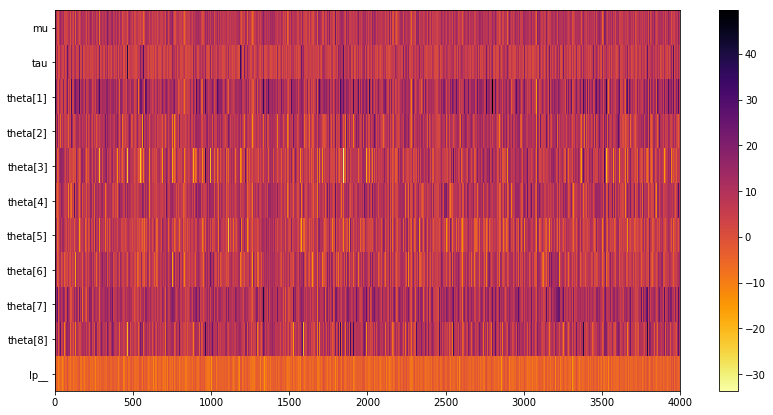

In [11]:
plt.figure(figsize=(14,7))
plt.imshow(img_non_centered_df.values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,10, par_len), pars)
plt.colorbar();

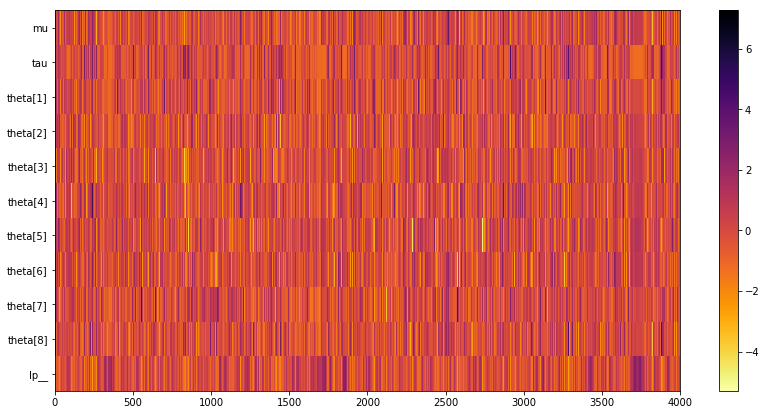

In [12]:
plt.figure(figsize=(14,7))
plt.imshow(img_centered_df_normalized.values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

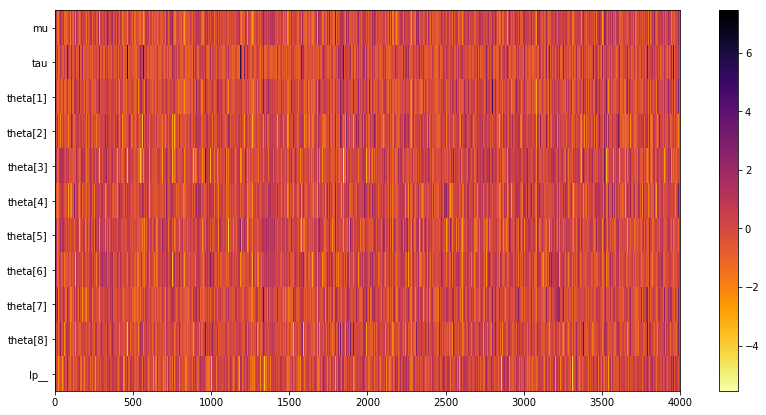

In [13]:
plt.figure(figsize=(14,7))
plt.imshow(img_non_centered_df_normalized.values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

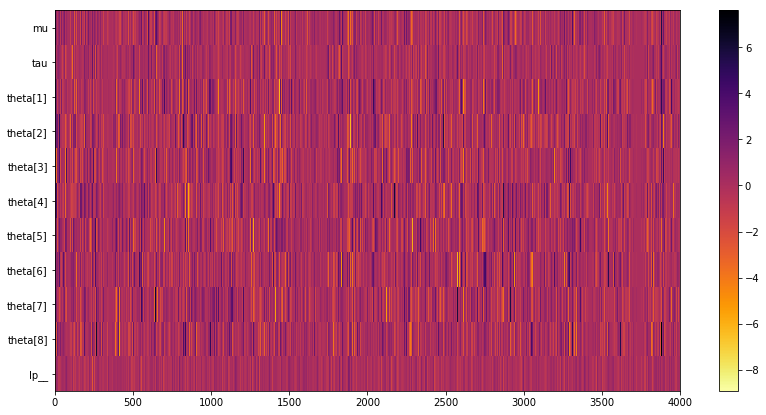

In [14]:
plt.figure(figsize=(14,7))
plt.imshow(img_centered_df_normalized_diff.values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

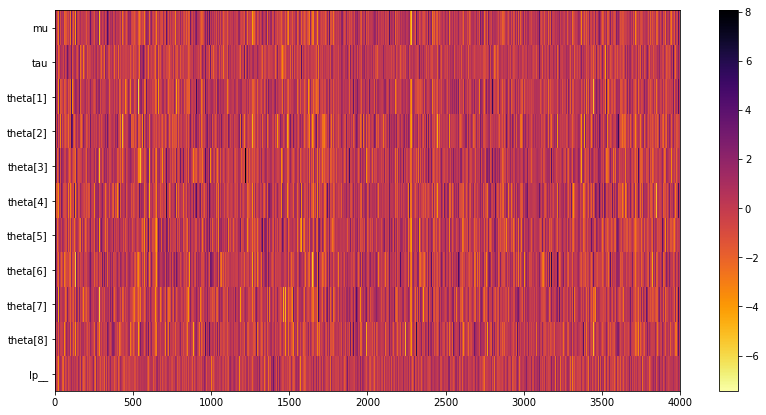

In [15]:
plt.figure(figsize=(14,7))
plt.imshow(img_non_centered_df_normalized_diff.values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

# Sorted by tau

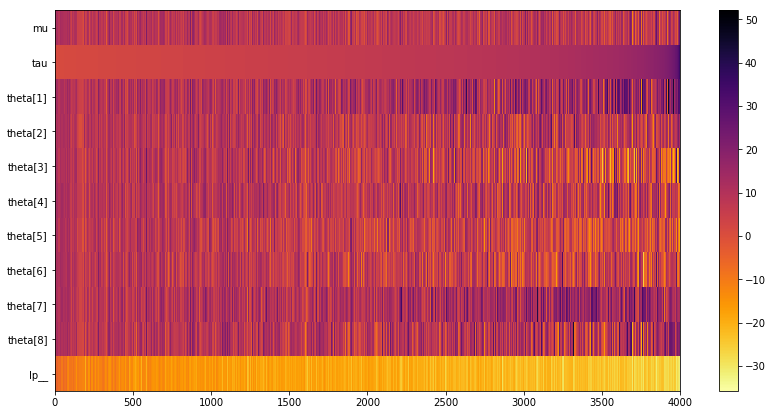

In [16]:
plt.figure(figsize=(14,7))
plt.imshow(img_centered_df.sort_values(by='tau').values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

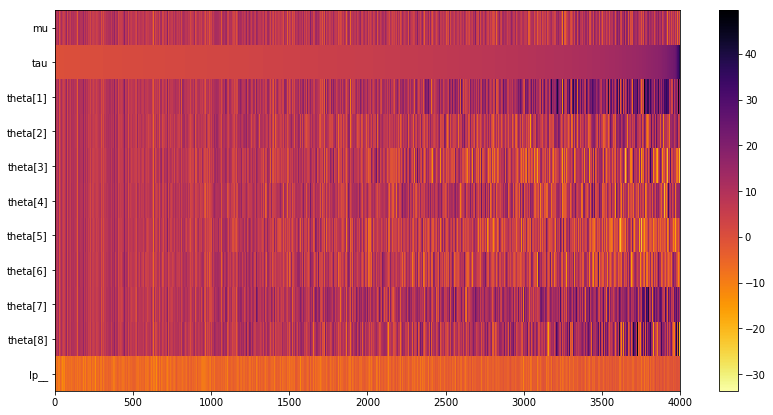

In [17]:
plt.figure(figsize=(14,7))
plt.imshow(img_non_centered_df.sort_values(by='tau').values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

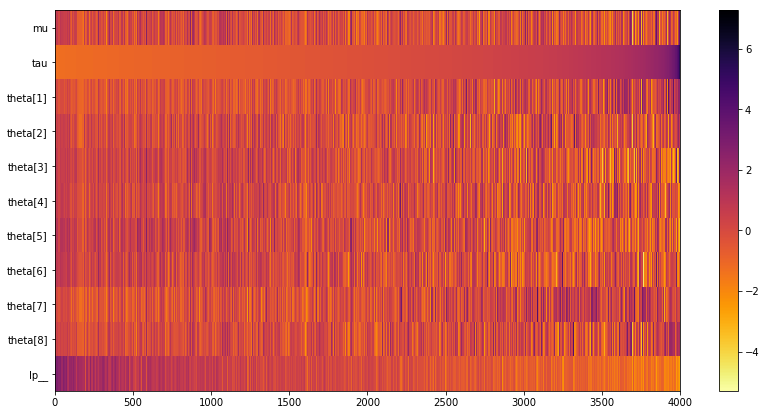

In [18]:
plt.figure(figsize=(14,7))
plt.imshow(img_centered_df_normalized.sort_values(by='tau').values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

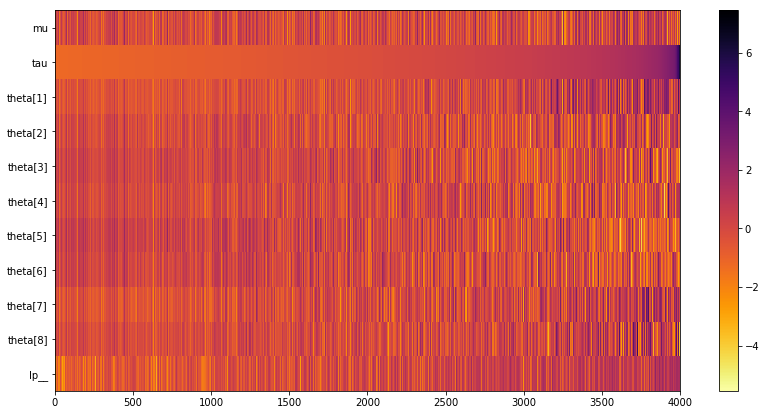

In [19]:
plt.figure(figsize=(14,7))
plt.imshow(img_non_centered_df_normalized.sort_values(by='tau').values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

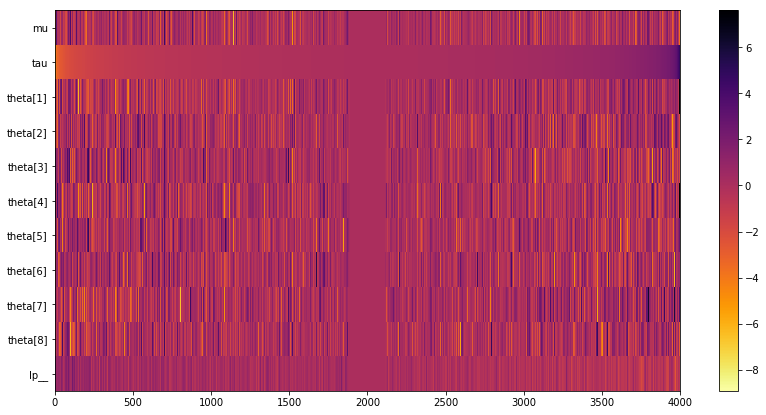

In [20]:
plt.figure(figsize=(14,7))
plt.imshow(img_centered_df_normalized_diff.sort_values(by='tau').values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

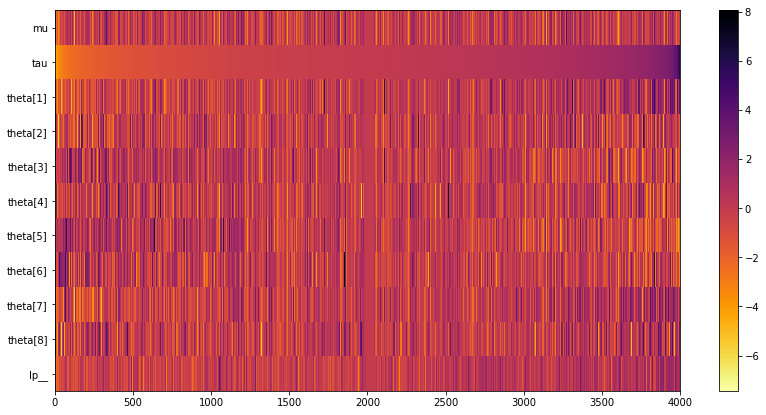

In [21]:
plt.figure(figsize=(14,7))
plt.imshow(img_non_centered_df_normalized_diff.sort_values(by='tau').values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

# Sort by divergence

In [22]:
centered_sort_order = np.argsort(centered_divergent.values)
non_centered_sort_order = np.argsort(non_centered_divergent.values)

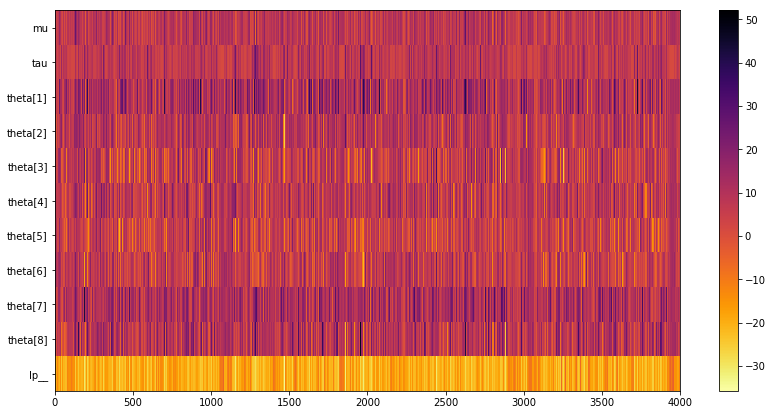

In [23]:
plt.figure(figsize=(14,7))
plt.imshow(img_centered_df.iloc[centered_sort_order, :].values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

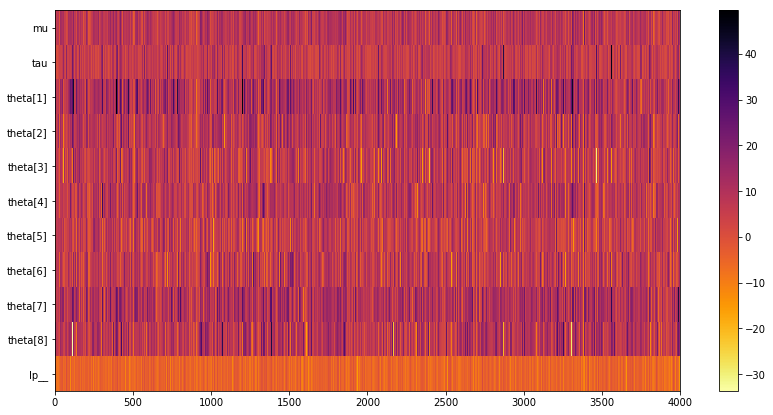

In [24]:
plt.figure(figsize=(14,7))
plt.imshow(img_non_centered_df.iloc[non_centered_sort_order, :].values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

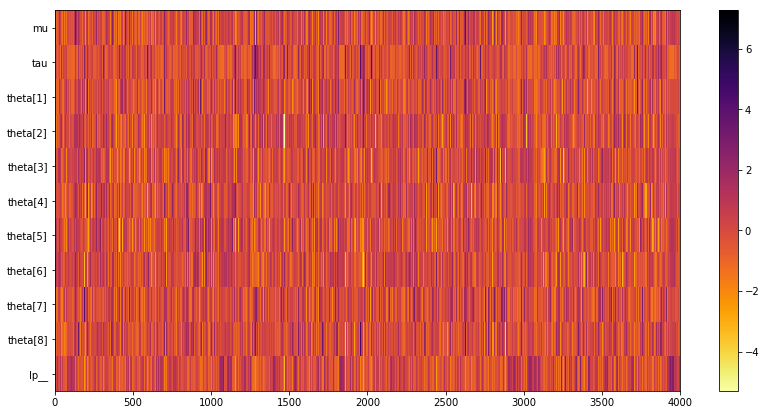

In [25]:
plt.figure(figsize=(14,7))
plt.imshow(img_centered_df_normalized.iloc[centered_sort_order, :].values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();

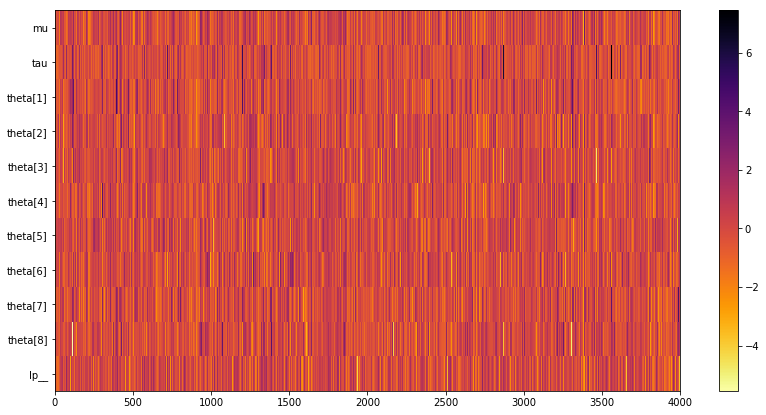

In [26]:
plt.figure(figsize=(14,7))
plt.imshow(img_non_centered_df_normalized.iloc[non_centered_sort_order, :].values.T, aspect='auto', cmap='inferno_r')
plt.yticks(np.linspace(0,par_len-1, par_len), pars)
plt.colorbar();